In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

In [97]:
train = pd.read_csv("train.csv")
stores = pd.read_csv("stores.csv")
features = pd.read_csv("features.csv")

In [99]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [101]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [103]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


# MERGING THE DATASET

In [106]:
df = pd.merge(train, features, on=["Store", "Date"], how="left")


In [108]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [110]:
df.shape

(421570, 15)

In [112]:
df = pd.merge(df, stores, on="Store", how="left")


In [114]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315


In [116]:
df.shape

(421570, 17)

In [118]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

# CONVERT DATE TO DATETIME FORMAT

In [121]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)
df["Day"] = df["Date"].dt.day

# CONVERT BOOLEAN HOLIDAY TO INTEGER

In [169]:
df["IsHoliday_y"] = df["IsHoliday_y"].astype(int)


# SORT DATE BY DATE

In [127]:
df=df.sort_values("Date")

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421570 n

In [131]:
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,2010,2,5,5
277665,29,5,2010-02-05,15552.08,False,24.36,2.788,NaN,NaN,NaN,...,NaN,131.527903,10.064,False,B,93638,2010,2,5,5


# HANDLING MISSING VALUES

In [134]:
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
df[markdown_cols] = df[markdown_cols].fillna(0)

In [136]:
print(df[markdown_cols].isnull().sum())

MarkDown1    0
MarkDown2    0
MarkDown3    0
MarkDown4    0
MarkDown5    0
dtype: int64


# ONE HOT ENCODE CATEGORICAL VARIABLE

In [139]:
 # df = pd.get_dummies(df, columns=["Type"], drop_first=True)

In [141]:
# df.sample(5)

# Checking Dupicates

In [144]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)


Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday_x, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI, Unemployment, IsHoliday_y, Type, Size, Year, Month, Week, Day]
Index: []

[0 rows x 21 columns]


# Exploratory Data Analysis (EDA)

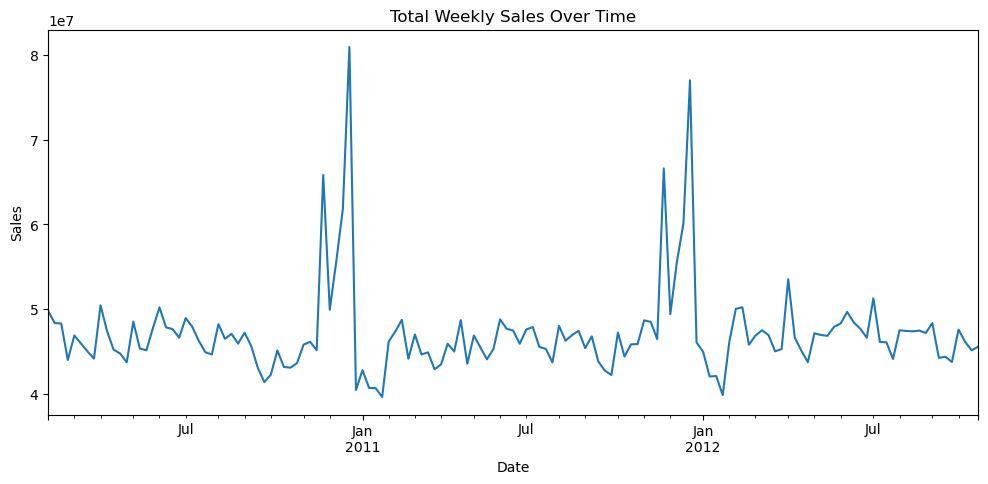

In [147]:
# Sales over time
plt.figure(figsize=(12, 5))
df.groupby('Date')['Weekly_Sales'].sum().plot()
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Sales')
plt.show()


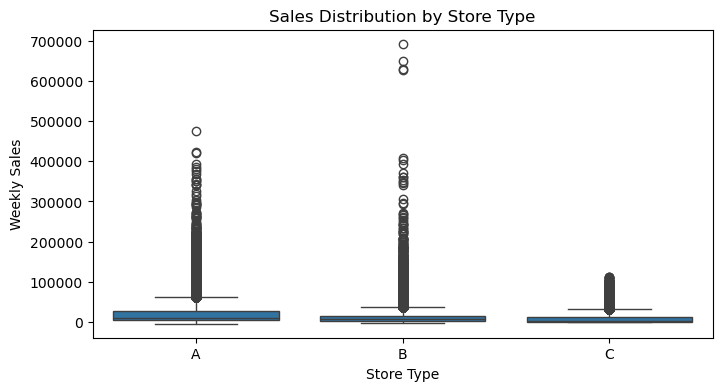

In [149]:
 #Sales by Store Type
plt.figure(figsize=(8, 4))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()


In [159]:
df.columns = df.columns.str.strip()




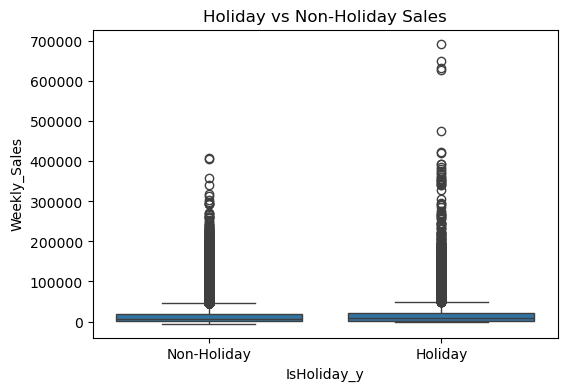

In [163]:
# Impact of holidays
plt.figure(figsize=(6, 4))
sns.boxplot(x='IsHoliday_y', y='Weekly_Sales', data=df)
plt.title('Holiday vs Non-Holiday Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


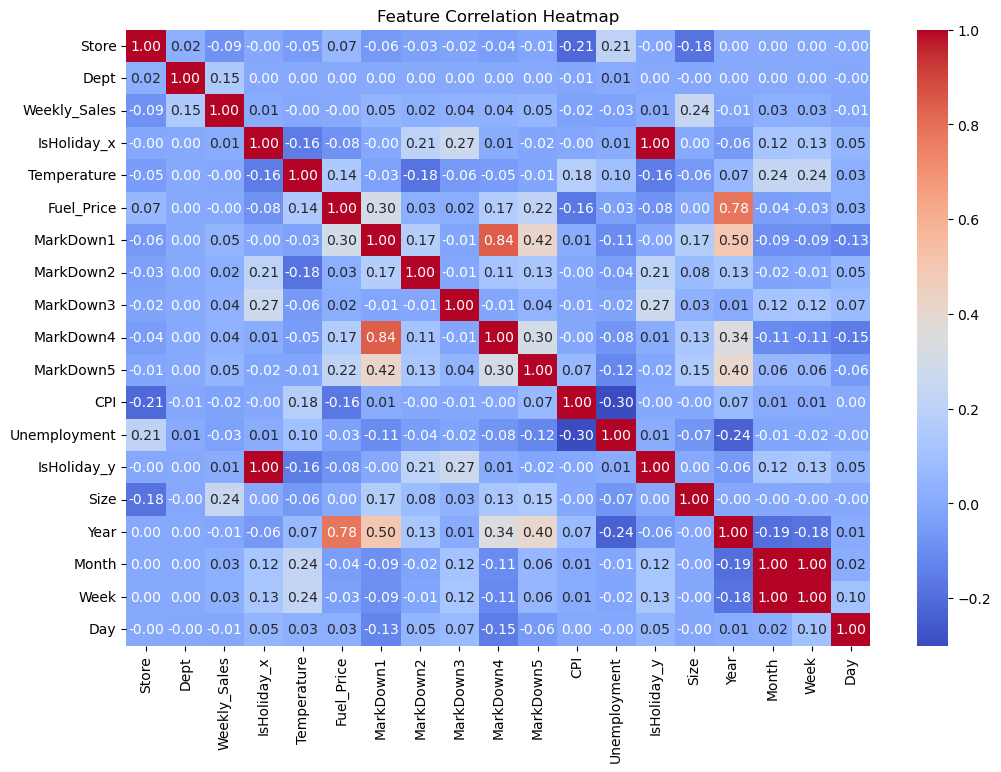

In [165]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


 # 1. Top Performing Stores

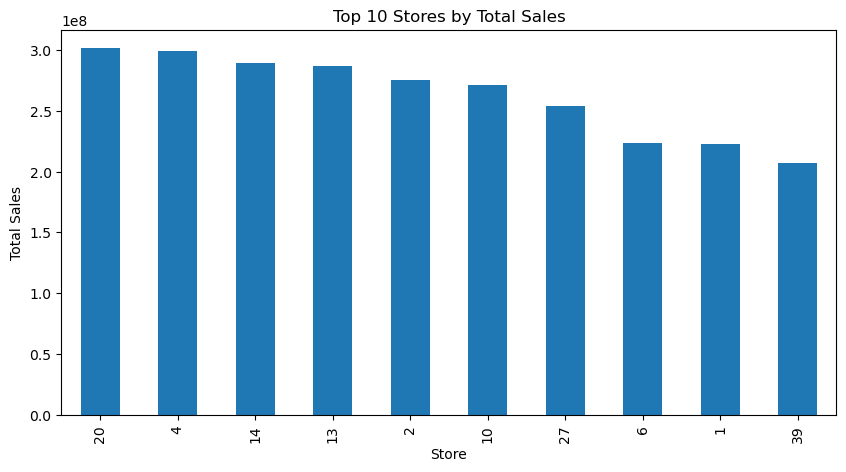

In [70]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
top_stores.plot(kind='bar', figsize=(10, 5), title='Top 10 Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()


 # 2 Department-wise Sales Trends


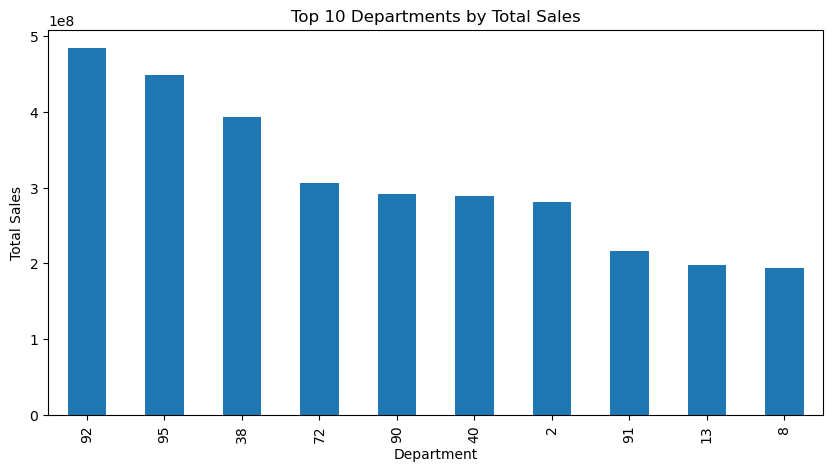

In [73]:
dept_sales = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
dept_sales.plot(kind='bar', figsize=(10, 5), title='Top 10 Departments by Total Sales')
plt.xlabel('Department')
plt.ylabel('Total Sales')
plt.show()


# 3. Weekly Sales Trend for a Specific Store

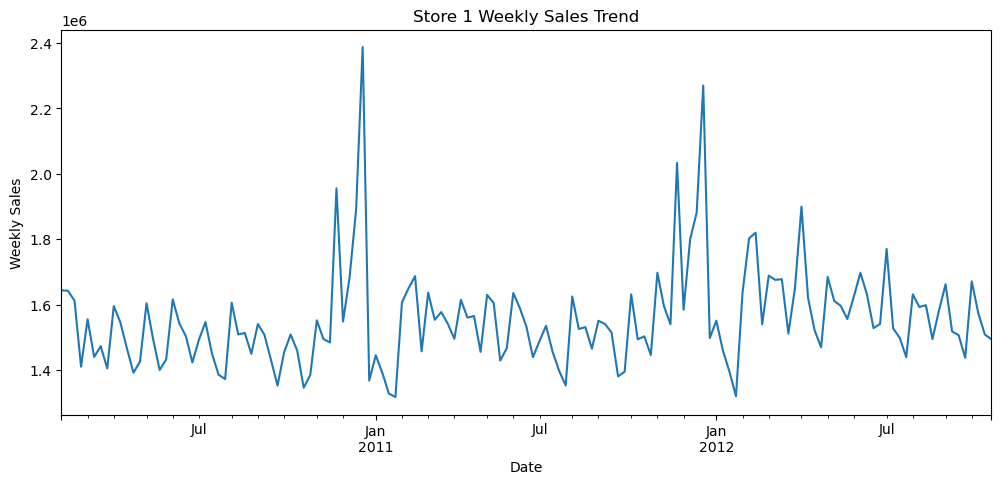

In [75]:
store_id = 1
store_sales = df[df['Store'] == store_id].groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(12, 5))
store_sales.plot()
plt.title(f'Store {store_id} Weekly Sales Trend')
plt.ylabel('Weekly Sales')
plt.show()


#  4. Sales Variation by Month

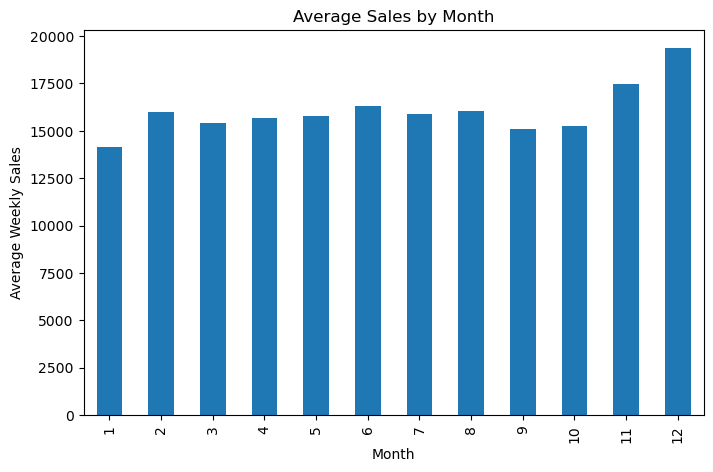

In [79]:
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
monthly_sales.plot(kind='bar', figsize=(8, 5), title='Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()


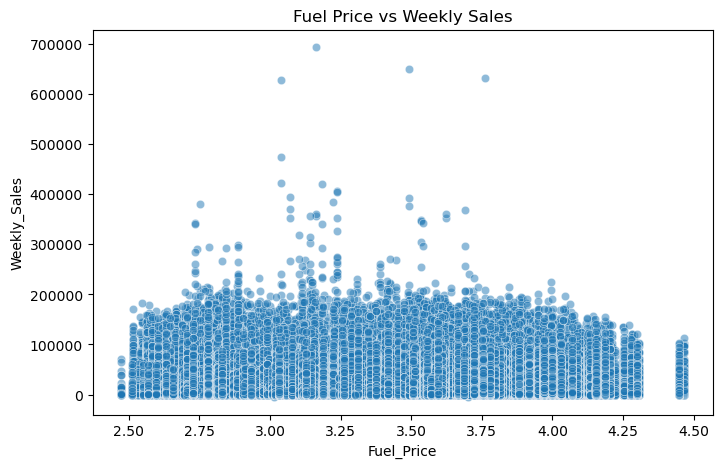

In [81]:
# 5. Impact of Fuel Price on Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, alpha=0.5)
plt.title('Fuel Price vs Weekly Sales')
plt.show()


# 8. Sales Distribution (Histogram & KDE)


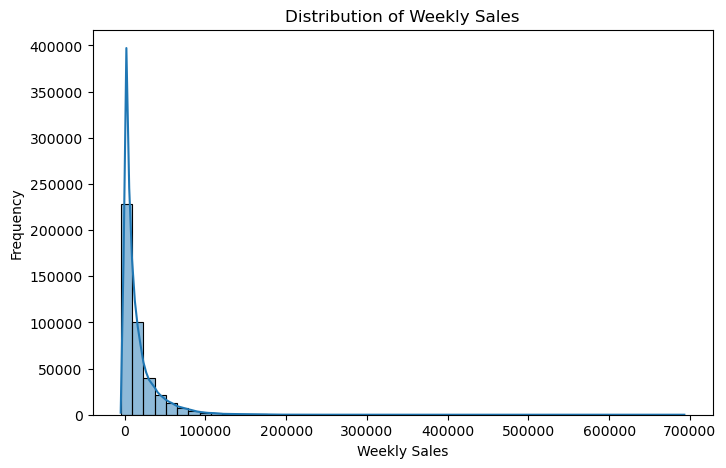

In [84]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()


# 7. Outlier Detection using Boxplot

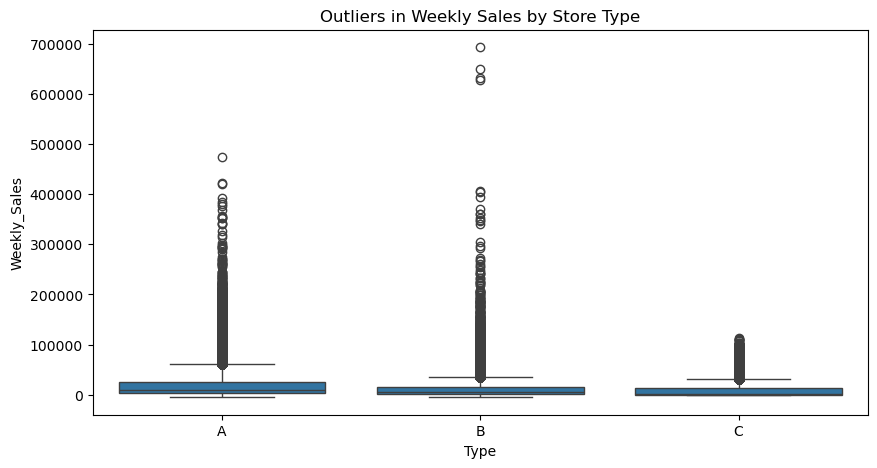

In [167]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Outliers in Weekly Sales by Store Type')
plt.show()


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421570 n